In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [24]:
df_train = pd.read_csv('train.csv')

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [26]:
df_train['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

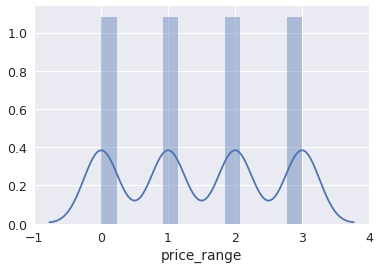

In [27]:
sns.distplot(df_train['price_range'])

In [28]:
df_train['price_range'].skew()

0.0

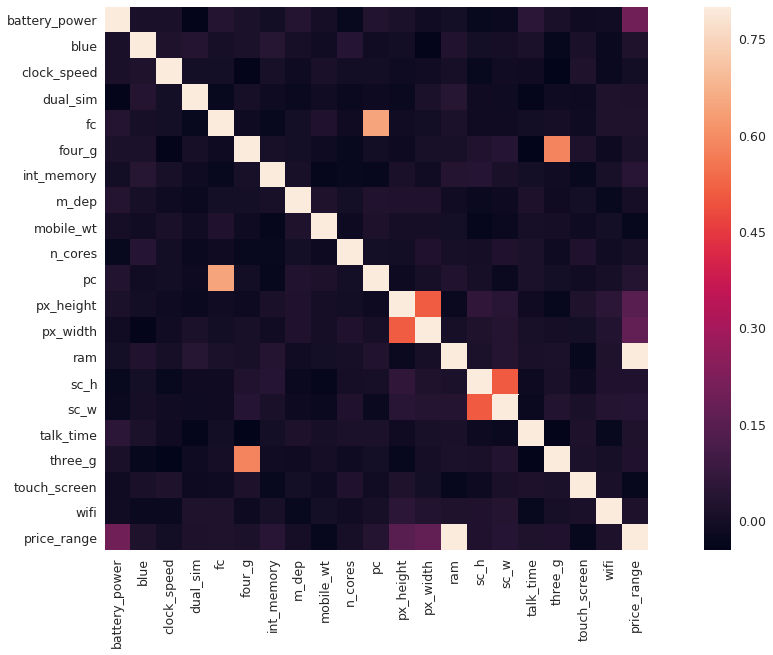

In [29]:
corrmat = df_train.corr()
f ,ax = plt.subplots(figsize = (20,10))
sns.heatmap(corrmat,vmax=.8,square=True)

In [30]:
k = 10
cols = corrmat.nlargest(k,'price_range')['price_range'].index # get k(10) rows which has largest corr with SalePrice (10 x 81) matrix
cols

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h'],
      dtype='object')

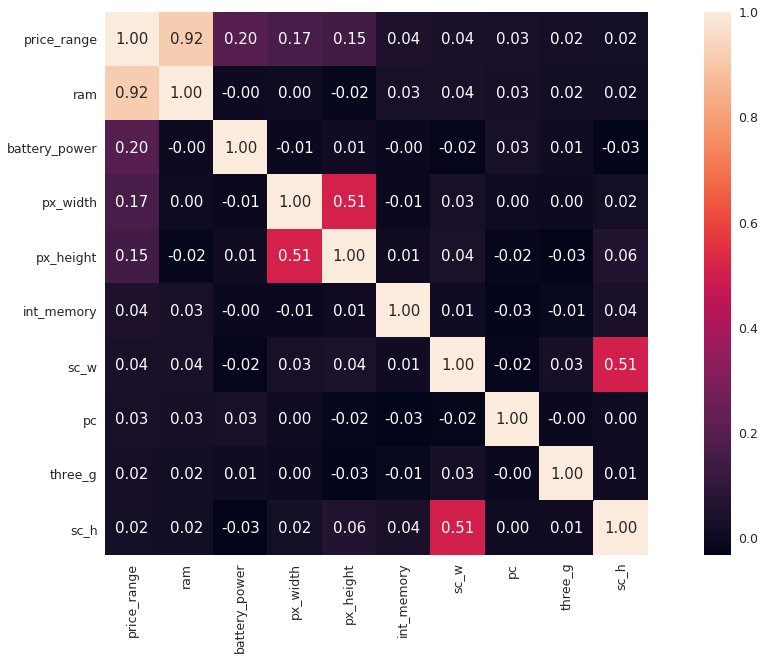

In [31]:
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)#font size in graph
f,ax = plt.subplots(figsize = (20,10))#setting size of graph
hm = sns.heatmap(cm,cbar = True,annot=True,square=True,fmt = '.2f',yticklabels=cols.values,xticklabels=cols.values)
#annot for getting corresponding values on graph
plt.show()

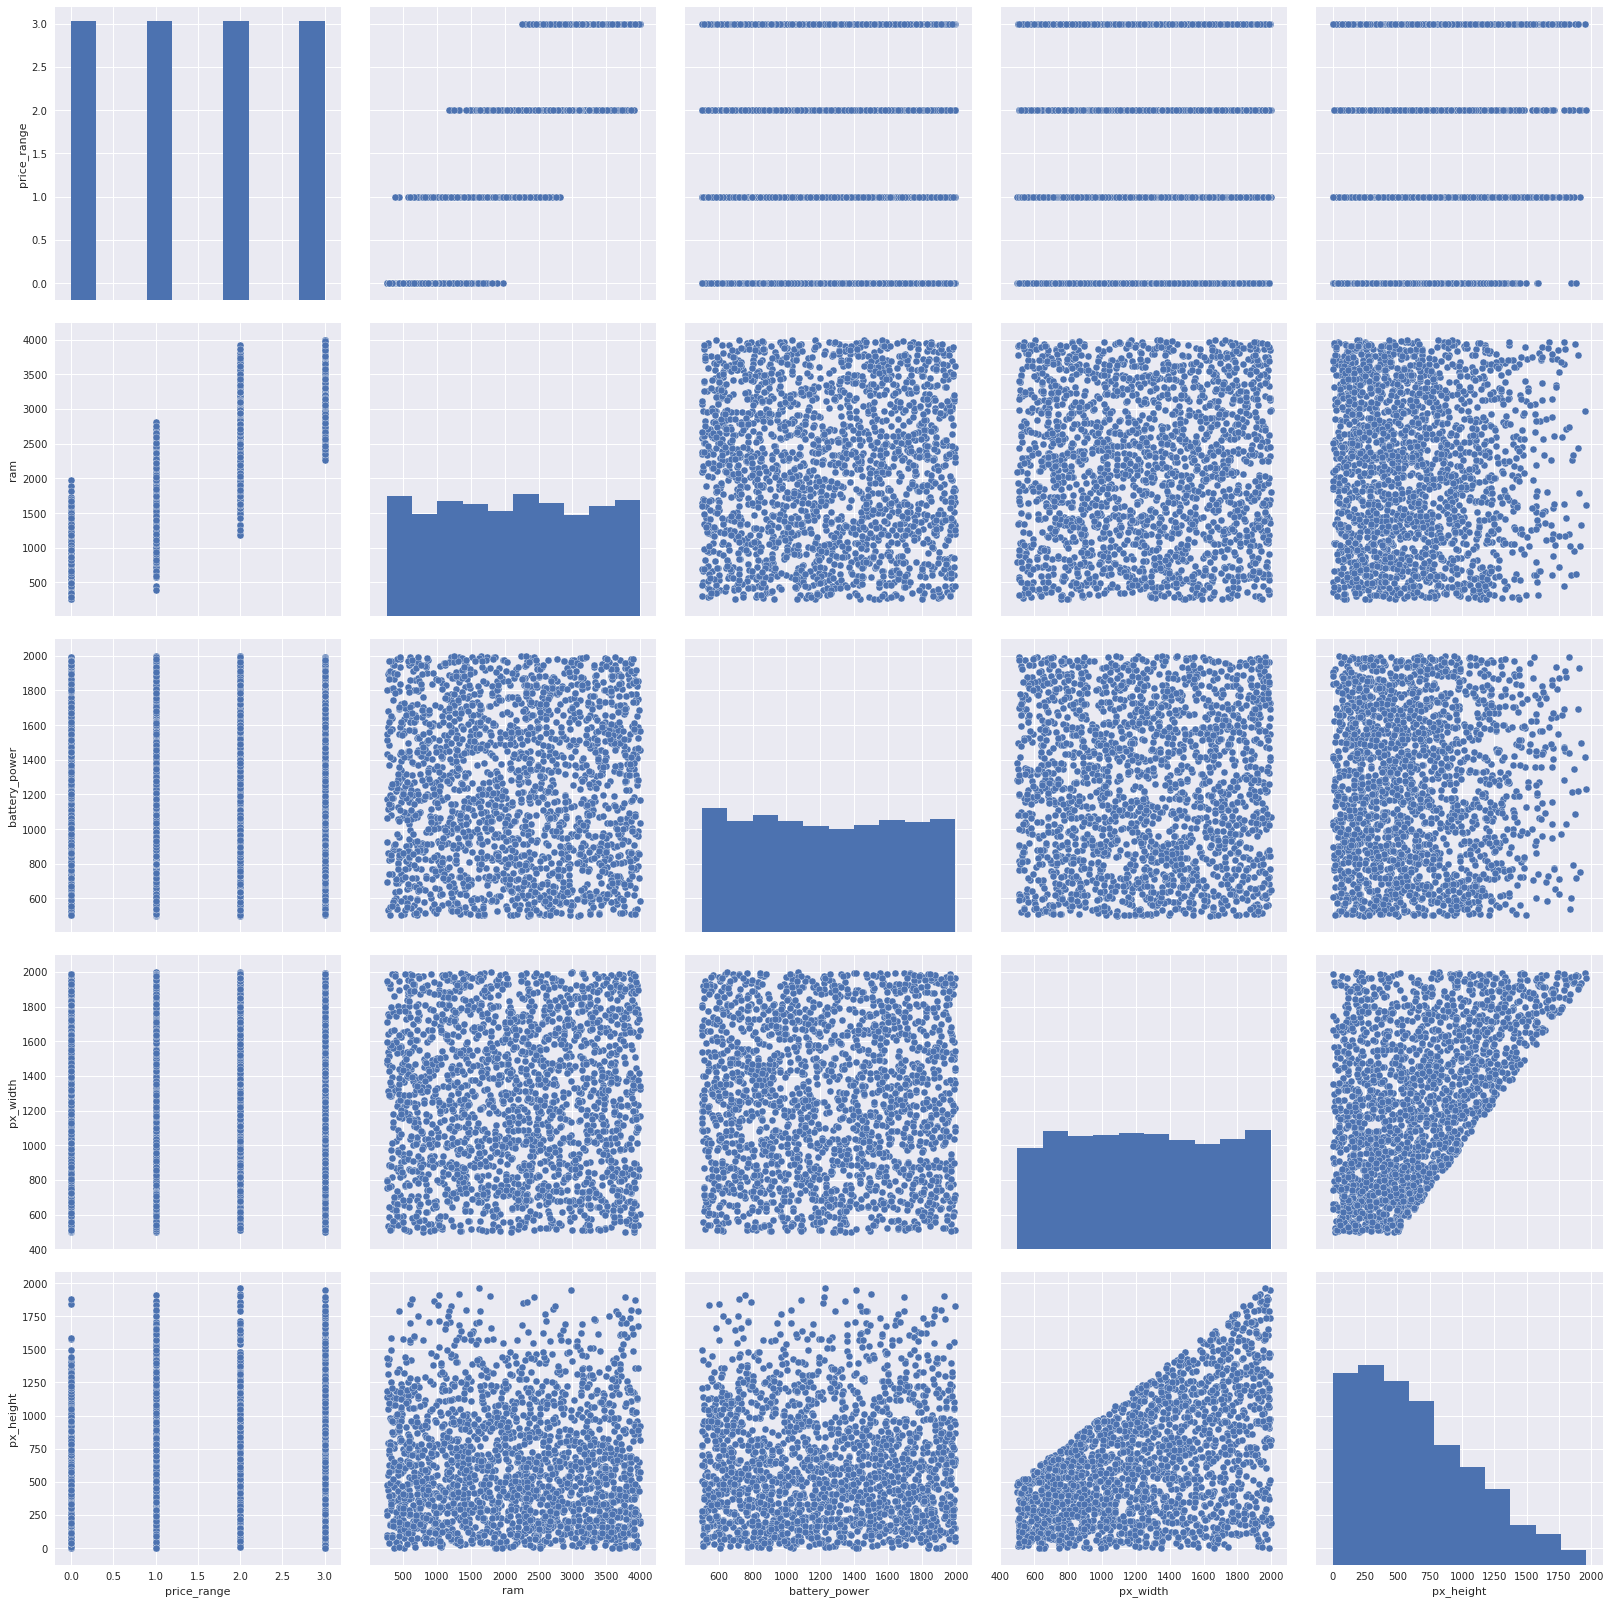

In [32]:
sns.set()
cols = ['price_range','ram','battery_power','px_width','px_height']
sns.pairplot(df_train[cols], size = 4.5)
plt.show()

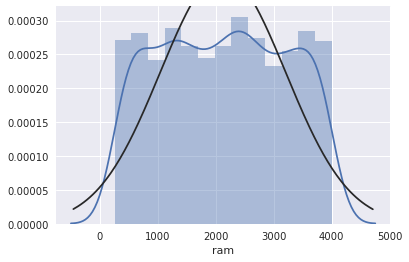

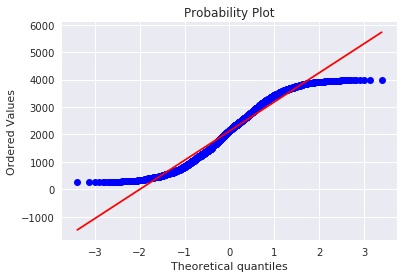

In [33]:
sns.distplot(df_train['ram'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['ram'], plot=plt)

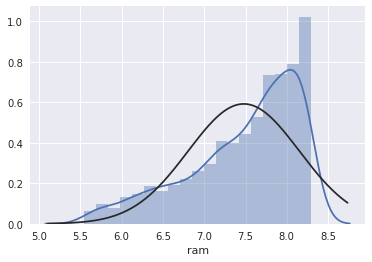

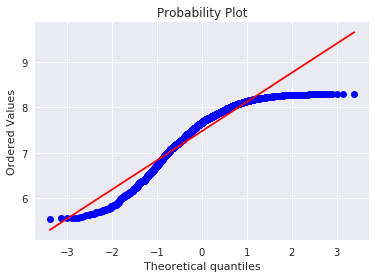